<h1 style="color: #8B0000;">ACCEDEMOS A NUESTRA API</h1> 

## Introducción:

Para acceder a la información de los anuncios de productos electrónicos, específicamente laptops, desde la API de MercadoLibre. Nuestro trabajo consistirá en procesar u limpiar los datos obtenidos para extraer información relevante como título, precio, número de vistas, condición del producto, cantidad disponible, URL de la imagen y enlace al producto.

Nuestra API contiene diferentes parámetros que nos ayudará a desarrollar el trabajo:

- **fecha_final:** Fecha de finalización del anuncio.
- **fecha_inicio** Fecha de inicio del anuncio.
- **id:** Identificador único del anuncio.
- **importe_gastado:** Importe gastado en el anuncio.
- **impresiones:** Número de impresiones del anuncio.
- **numero_vistas:** Número de vistas del anuncio.
- **tamano_publico_estimado:** Tamaño estimado del público objetivo.
- **titulo:** Título del anuncio del producto.
- **url_imagen:** URL de la imagen del producto.
- **url_producto:** URL del producto en MercadoLibre.

Con nuestra api podemos establecer los siguientes objetivos para enfocarnos en varias métricas y análisis que nos permitirán evaluar el rendimiento de las campañas publicitarias.

## Objetivos:

- Análisis de Impresiones y Vistas.
- Evaluación del Tamaño del Público Estimado.
- Análisis Temporal.


<h4 style="color: #8B0000;">Solicitar la información</h4> 
Este script proporciona cierta información sobre anuncios de productos, de los cuales vamos a solicitar y trabajar en el desarrollo del trabajo.

In [25]:
import requests

# URL de la API
api_url = 'http://127.0.0.1:5000/anuncios'

# Hacer la solicitud GET a la API
response = requests.get(api_url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta JSON en un diccionario de Python
    data = response.json()
    
    # Procesar y mostrar los datos
    for anuncio in data:
        print(f"ID: {anuncio['id']}")
        print(f"Título: {anuncio['titulo']}")
        print(f"Tamaño de Público Estimado: {anuncio['tamano_publico_estimado']}")
        print(f"Importe Gastado: {anuncio['importe_gastado']}")
        print(f"Impresiones: {anuncio['impresiones']}")
        print(f"Fecha Inicio: {anuncio['fecha_inicio']}")
        print(f"Fecha Final: {anuncio['fecha_final']}")
        print(f"URL Imagen: {anuncio['url_imagen']}")
        print(f"URL Producto: {anuncio['url_producto']}")
        print(f"Número de Vistas: {anuncio['numero_vistas']}")
        print("\n")
else:
    print(f"Error al acceder a la API: {response.status_code}")


ID: 1
Título: Laptop Asus Asus Tuf Gaming A15 Amd R5 Rtx2050 16gb 512gb Color Negro
Tamaño de Público Estimado: 10 mil
Importe Gastado: S/.600
Impresiones: 4 mil
Fecha Inicio: 2023-01-01
Fecha Final: 2023-01-31
URL Imagen: http://http2.mlstatic.com/D_774375-MLU76509333540_052024-I.jpg
URL Producto: https://www.mercadolibre.com.mx/laptop-asus-asus-tuf-gaming-a15-amd-r5-rtx2050-16gb-512gb-color-negro/p/MLM37283669
Número de Vistas: 1647


ID: 2
Título: Notebook 245 G9 14in Negro 16gb De Ram - 512gb Ssd - Amd Ryzen 3
Tamaño de Público Estimado: 20 mil
Importe Gastado: S/.1000
Impresiones:  5 mil
Fecha Inicio: 2023-02-01
Fecha Final: 2023-02-28
URL Imagen: http://http2.mlstatic.com/D_676170-MLA74065928204_012024-I.jpg
URL Producto: https://www.mercadolibre.com.mx/notebook-245-g9-14in-negro-16gb-de-ram-512gb-ssd-amd-ryzen-3/p/MLM27440340
Número de Vistas: 1501


ID: 3
Título: Laptop Gamer Thunderobot 911mt 12th Intel Core I7 12650h 16gb De Ram 512gb Ssd, Nvidia Geforce Rtx 3050 165 Hz 1920x

<h4 style="color: #8B0000;">Transformamos los datos obtenidos en formato csv</h4>

Extraemos la información de las campañas publicitarias del producto ya establecido, en nuestro caso Laptop,
y almacenamos estos datos en formato csv.

In [26]:
import csv

# URL de la API
api_url = 'http://127.0.0.1:5000/anuncios'

# Hacer la solicitud GET a la API
response = requests.get(api_url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta JSON en un diccionario de Python
    data = response.json()
    
    # Nombre del archivo CSV
    csv_filename = 'data_api.csv'

    # Definir los nombres de campo para el encabezado del CSV
    fieldnames = ['id', 'titulo', 'tamano_publico_estimado', 'importe_gastado', 
                  'impresiones', 'fecha_inicio', 'fecha_final', 'url_imagen', 
                  'url_producto', 'numero_vistas']

    # Guardar en un archivo CSV
    with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Escribir el encabezado
        writer.writeheader()

        # Escribir los datos
        for anuncio in data:
            # Asegurar que el índice sea el campo 'id'
            writer.writerow({'id': anuncio['id'],
                             'titulo': anuncio['titulo'],
                             'tamano_publico_estimado': anuncio['tamano_publico_estimado'],
                             'importe_gastado': anuncio['importe_gastado'],
                             'impresiones': anuncio['impresiones'],
                             'fecha_inicio': anuncio['fecha_inicio'],
                             'fecha_final': anuncio['fecha_final'],
                             'url_imagen': anuncio['url_imagen'],
                             'url_producto': anuncio['url_producto'],
                             'numero_vistas': anuncio['numero_vistas']})

    print(f"Se ha guardado la información en {csv_filename}")
else:
    print(f"Error al acceder a la API: {response.status_code}")


Se ha guardado la información en data_api.csv


<h4 style="color: #8B0000;">Mostrando los datos usando pandas</h4>
Para una mejor visualización de los datos lo mostraremos en un data frame.

In [27]:
import pandas as pd
df= pd.read_csv('data_api.csv',index_col=0) #index_col=0 para asegurarnos que el indice sea la primera columna
df

,titulo,tamano_publico_estimado,importe_gastado,impresiones,fecha_inicio,fecha_final,url_imagen,url_producto,numero_vistas
id,,,,,,,,,
1,Laptop Asus Asus Tuf Gaming A15 Amd R5 Rtx2050...,10 mil,S/.600,4 mil,2023-01-01,2023-01-31,http://http2.mlstatic.com/D_774375-MLU76509333...,https://www.mercadolibre.com.mx/laptop-asus-as...,1647
2,Notebook 245 G9 14in Negro 16gb De Ram - 512gb...,20 mil,S/.1000,5 mil,2023-02-01,2023-02-28,http://http2.mlstatic.com/D_676170-MLA74065928...,https://www.mercadolibre.com.mx/notebook-245-g...,1501
3,Laptop Gamer Thunderobot 911mt 12th Intel Core...,15 mil,S/.800,4 mil,2023-03-01,2023-03-31,http://http2.mlstatic.com/D_901042-MLU76249680...,https://www.mercadolibre.com.mx/laptop-gamer-t...,490
4,"Laptop Hp 245 G9 Amd Ryzen 3 3250u Hasta 3,5 G...",10 mil,S/.600,2 mil,2023-04-01,2023-04-30,http://http2.mlstatic.com/D_661047-MLU73159073...,https://www.mercadolibre.com.mx/laptop-hp-245-...,264
5,Laptop Lenovo Ideapad Slim 3 15.6'' Ci5 8gb + ...,30 mil,S/.1500,5 mil,2023-05-01,2023-05-31,http://http2.mlstatic.com/D_621621-MLU73824611...,https://www.mercadolibre.com.mx/laptop-lenovo-...,585
6,"Laptop Acer Aspire 3 15.6 Ryzen 7, 16gb/512gb,...",40 mil,S/.1600,12 mil,2023-06-01,2023-06-30,http://http2.mlstatic.com/D_701272-MLU75124279...,https://www.mercadolibre.com.mx/laptop-acer-as...,4509
7,Laptop Asus Vivobook F15 15.6 Core I7 1255u 16...,40 mil,S/.1700,14 mil,2023-07-01,2023-07-31,http://http2.mlstatic.com/D_976166-MLU73572150...,https://www.mercadolibre.com.mx/laptop-asus-vi...,4335
8,Laptop Hp 240 G9 Intel Core I3 1215u 512gb Ssd...,20 mil,S/.1000,4 mil,2023-08-01,2023-08-31,http://http2.mlstatic.com/D_656246-MLU77088905...,https://www.mercadolibre.com.mx/laptop-hp-240-...,469
9,14.1'' Laptop 8 Ram+512gb Ssd Intel Celeron N4...,10 mil,S/.600,2 mil,2023-09-01,2023-09-30,http://http2.mlstatic.com/D_653954-MLM76337017...,https://articulo.mercadolibre.com.mx/MLM-30481...,541


<h4 style="color: #8B0000;">Razón entre impresiones y vistas</h4>
Evaluamos la relación entre el número de impresiones y el número de vistas para determinar la efectividad de las campañas publicitarias.
La razón entre impresiones y vistas es una métrica importante en la evaluación de la efectividad de una campaña publicitaria. Esta métrica proporciona información sobre cómo las impresiones generadas (es decir, cuántas veces se mostró un anuncio) se comparan con las vistas (cuántas veces se visualizó realmente el anuncio por los usuarios).

ID: 1
Título: Laptop Asus Asus Tuf Gaming A15 Amd R5 Rtx2050 16gb 512gb Color Negro
Impresiones: 4 mil
Razón Impresiones a Vistas: 2.43
------------------------
ID: 2
Título: Notebook 245 G9 14in Negro 16gb De Ram - 512gb Ssd - Amd Ryzen 3
Impresiones:  5 mil
Razón Impresiones a Vistas: 3.33
------------------------
ID: 3
Título: Laptop Gamer Thunderobot 911mt 12th Intel Core I7 12650h 16gb De Ram 512gb Ssd, Nvidia Geforce Rtx 3050 165 Hz 1920x1080px Windows 11 Pro
Impresiones: 4 mil
Razón Impresiones a Vistas: 8.16
------------------------
ID: 4
Título: Laptop Hp 245 G9 Amd Ryzen 3 3250u Hasta 3,5 Ghz, Memoria Ram De 16 Gb Ddr4, Ssd 256 Gb, Windows 11 Home 64-bit, Teclado En Español, 14 Pulgadas, Negro
Impresiones: 2 mil
Razón Impresiones a Vistas: 7.58
------------------------
ID: 5
Título: Laptop Lenovo Ideapad Slim 3 15.6'' Ci5 8gb + 512gb Ssd
Impresiones: 5 mil
Razón Impresiones a Vistas: 8.55
------------------------
ID: 6
Título: Laptop Acer Aspire 3 15.6 Ryzen 7, 16gb/512gb, Wi

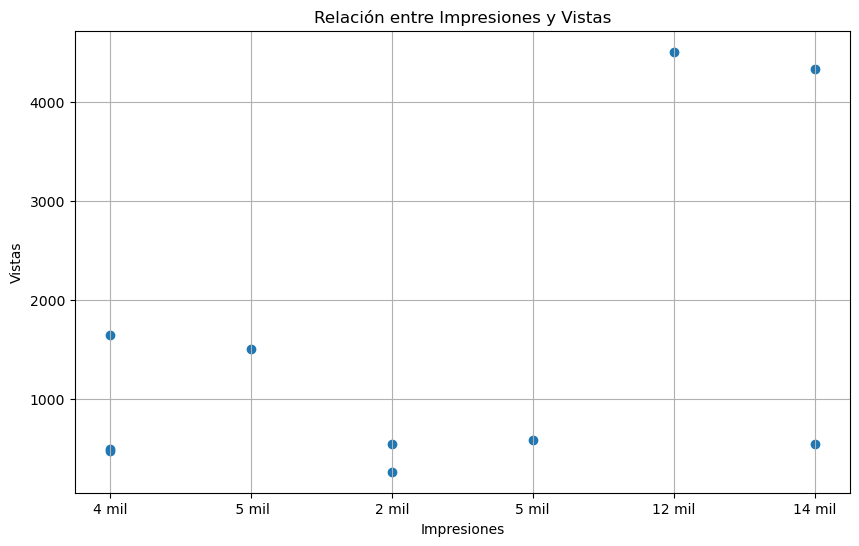

In [30]:
data = response.json()
# Calcular métricas clave para cada anuncio
for anuncio in data:

    # Convertir impresiones a int
    impresiones = int(anuncio['impresiones'].replace(' mil', '000').replace(',', ''))

    # Convertir numero_vistas a int
    numero_vistas = int(anuncio['numero_vistas'])

    # Razón impresiones a vistas
    razon_impresiones_vistas = impresiones / numero_vistas if numero_vistas else 0

    # Imprimir resultados para cada anuncio
    print(f"ID: {anuncio['id']}")
    print(f"Título: {anuncio['titulo']}")
    print(f"Impresiones: {anuncio['impresiones']}")
    print(f"Razón Impresiones a Vistas: {razon_impresiones_vistas:.2f}")
    print("------------------------")

import matplotlib.pyplot as plt

# Graficar la relación entre Impresiones y Vistas
plt.figure(figsize=(10, 6))
plt.scatter(df['impresiones'], df['numero_vistas'])
plt.title('Relación entre Impresiones y Vistas')
plt.xlabel('Impresiones')
plt.ylabel('Vistas')
plt.grid(True)
plt.show()


<h4 style="color: #8B0000;">Evaluación del tamaño de público estimado</h4>
Este analisis nos sirve principalmente para entender cómo el tamaño estimado del público objetivo impacta en la efectividad de las campañas publicitarias, específicamente en términos de impresiones por cada 1000 personas en ese público. 

In [42]:
for anuncio in data:
    tamano_publico = int(anuncio['tamano_publico_estimado'].replace(' mil', '000'))
    impresiones = int(anuncio['impresiones'].replace(' mil', '000'))  # Convertir a entero
    
    # Calcular la tasa de impresiones por tamaño del público
    tasa_impresiones_por_publico = (impresiones / tamano_publico) * 1000
    
    # Mostrar resultados
    print(f"ID: {anuncio['id']}")
    print(f"Título: {anuncio['titulo']}")
    print(f"Tamaño de Público Estimado: {tamano_publico}")
    print(f"Impresiones: {impresiones}")
    print(f"Tasa de Impresiones por Tamaño del Público: {tasa_impresiones_por_publico:.2f} impresiones por cada 1000 personas en el público estimado")
    print("------------------------")


ID: 1
Título: Laptop Asus Asus Tuf Gaming A15 Amd R5 Rtx2050 16gb 512gb Color Negro
Tamaño de Público Estimado: 10000
Impresiones: 4000
Tasa de Impresiones por Tamaño del Público: 400.00 impresiones por cada 1000 personas en el público estimado
------------------------
ID: 2
Título: Notebook 245 G9 14in Negro 16gb De Ram - 512gb Ssd - Amd Ryzen 3
Tamaño de Público Estimado: 20000
Impresiones: 5000
Tasa de Impresiones por Tamaño del Público: 250.00 impresiones por cada 1000 personas en el público estimado
------------------------
ID: 3
Título: Laptop Gamer Thunderobot 911mt 12th Intel Core I7 12650h 16gb De Ram 512gb Ssd, Nvidia Geforce Rtx 3050 165 Hz 1920x1080px Windows 11 Pro
Tamaño de Público Estimado: 15000
Impresiones: 4000
Tasa de Impresiones por Tamaño del Público: 266.67 impresiones por cada 1000 personas en el público estimado
------------------------
ID: 4
Título: Laptop Hp 245 G9 Amd Ryzen 3 3250u Hasta 3,5 Ghz, Memoria Ram De 16 Gb Ddr4, Ssd 256 Gb, Windows 11 Home 64-bit, 

<h4 style="color: #8B0000;">Análisis Temporal</h4>
Este análisis nos ayudará a ver cómo evoluciona el rendimiento a lo largo de diferentes campañas en el tiempo,
y para ello usaremos un gráfico de líneas:

ID: 1
Título: Laptop Asus Asus Tuf Gaming A15 Amd R5 Rtx2050 16gb 512gb Color Negro
Duración de la Campaña: 30 días
Impresiones: 4000
Número de Vistas: 1647


ID: 2
Título: Notebook 245 G9 14in Negro 16gb De Ram - 512gb Ssd - Amd Ryzen 3
Duración de la Campaña: 27 días
Impresiones: 5000
Número de Vistas: 1501


ID: 3
Título: Laptop Gamer Thunderobot 911mt 12th Intel Core I7 12650h 16gb De Ram 512gb Ssd, Nvidia Geforce Rtx 3050 165 Hz 1920x1080px Windows 11 Pro
Duración de la Campaña: 30 días
Impresiones: 4000
Número de Vistas: 490


ID: 4
Título: Laptop Hp 245 G9 Amd Ryzen 3 3250u Hasta 3,5 Ghz, Memoria Ram De 16 Gb Ddr4, Ssd 256 Gb, Windows 11 Home 64-bit, Teclado En Español, 14 Pulgadas, Negro
Duración de la Campaña: 29 días
Impresiones: 2000
Número de Vistas: 264


ID: 5
Título: Laptop Lenovo Ideapad Slim 3 15.6'' Ci5 8gb + 512gb Ssd
Duración de la Campaña: 30 días
Impresiones: 5000
Número de Vistas: 585


ID: 6
Título: Laptop Acer Aspire 3 15.6 Ryzen 7, 16gb/512gb, Windows 11 Color

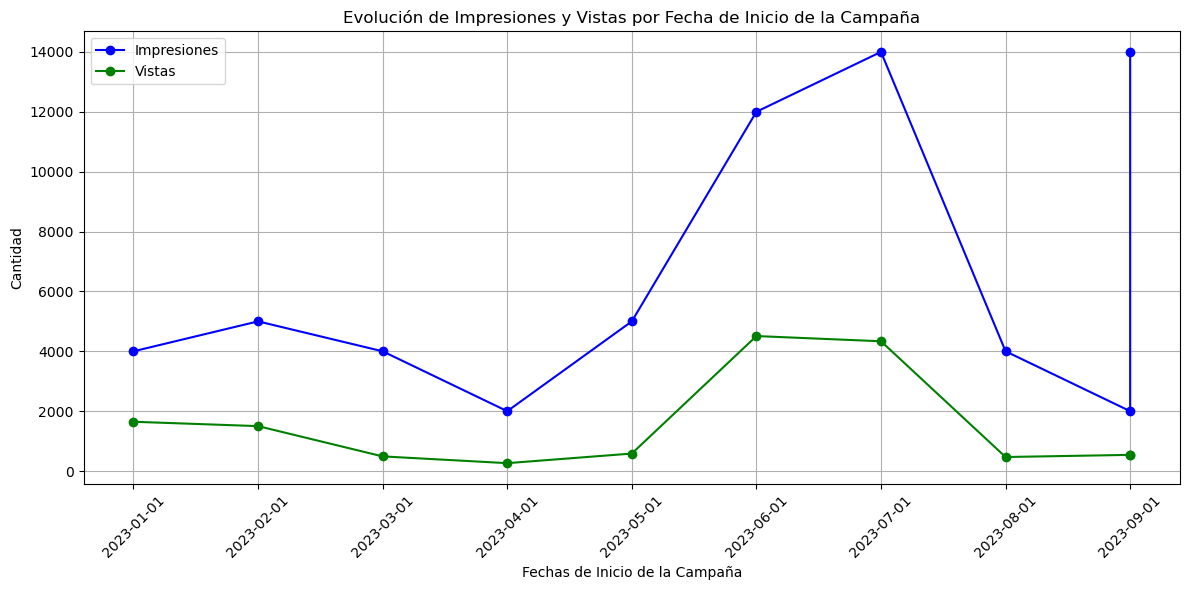

In [43]:
from datetime import datetime

# Analizar la relación entre la duración de la campaña y el rendimiento
for anuncio in data:
    fecha_inicio = datetime.strptime(anuncio['fecha_inicio'], '%Y-%m-%d')
    fecha_final = datetime.strptime(anuncio['fecha_final'], '%Y-%m-%d')
    duracion_campana = (fecha_final - fecha_inicio).days
    vistas = int(anuncio['numero_vistas'])
    impresiones = int(anuncio['impresiones'].replace(' mil', '000'))

    print(f"ID: {anuncio['id']}")
    print(f"Título: {anuncio['titulo']}")
    print(f"Duración de la Campaña: {duracion_campana} días")
    print(f"Impresiones: {impresiones}")
    print(f"Número de Vistas: {vistas}")
    print("\n")

import matplotlib.pyplot as plt

# Preparar datos para el gráfico de líneas
fechas = []
impresiones = []
vistas = []

for anuncio in data:
    fecha_inicio = datetime.strptime(anuncio['fecha_inicio'], '%Y-%m-%d')
    fecha_final = datetime.strptime(anuncio['fecha_final'], '%Y-%m-%d')
    duracion_campana = (fecha_final - fecha_inicio).days
    fechas.append(fecha_inicio.strftime('%Y-%m-%d'))
    vistas.append(int(anuncio['numero_vistas']))
    impresiones.append(int(anuncio['impresiones'].replace(' mil', '000')))

plt.figure(figsize=(12, 6))

plt.plot(fechas, impresiones, marker='o', linestyle='-', color='b', label='Impresiones')
plt.plot(fechas, vistas, marker='o', linestyle='-', color='g', label='Vistas')

plt.xlabel('Fechas de Inicio de la Campaña')
plt.ylabel('Cantidad')
plt.title('Evolución de Impresiones y Vistas por Fecha de Inicio de la Campaña')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
